In [1]:
pathtorepo = "C:\\Users\\Alex\\Desktop\\"

using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems, ForwardDiff, LinearAlgebra
E, x, y  = 0..20, 0..20,  0..20
box = E × x × y
using CairoMakie, GLMakie;

In [3]:
function RMA(u, p, t)
    x,y,z = u
    r, k, a1, b1, a2, b2, d1, d2 = p
    
   ẋ = x * ( r * ( 1 - x/k ) - a1 * y / ( 1 + b1 * x ) )
   ẏ = y * ( a1 * x / ( 1 + b1 * x ) - a2 * z / ( 1 + b2 * y ) - d1 )
   ż = z * ( a2 * y / ( 1 + b2 * y ) - d2 )
    return SVector(ẋ , ẏ, ż)
end

RMA (generic function with 1 method)

In [4]:
function jac_RMA(u, p, t)
    x,y,z = u
    r, k, a1, b1, a2, b2, d1, d2 = p

    fx = x * ( -r/k + a1 *y * b1 / (b1 * x + 1)^2 ) + r * (1 - x/k) - a1*y/(1+b1*x) 
    gy = -a2 * z / ( b2 * y + 1 ) + a2 * b2 * z * y / ( b2 * y + 1 )^2 + a1 * x / (b1 * x + 1) - d1
    hz = a2 * y / ( 1 + b2 * y ) - d2

    fy = -a1 * x / (1 + b1 * x)
    gz = -a2 * y / (1 + b2 * y)

    gx = y * a1 / ( b1 * x + 1 )^2
    hy = z * a2 / ( b2 * y + 1 )^2

    return SMatrix{3, 3}( fx, gx, 0.0,
                    fy, gy, hy,
                    0.0, gz, hz )
end

jac_RMA (generic function with 1 method)

In [5]:
a1 = 5; a2 = 0.1; b1 = 3; b2 = 2; d1 = 0.4; d2 = 0.01

0.01

In [80]:
r =  0.9
k =  1.18
p = [r, k, a1, b1, a2, b2, d1, d2]

8-element Vector{Float64}:
 0.9
 1.18
 5.0
 3.0
 0.1
 2.0
 0.4
 0.01

In [81]:
integrator_setting = (alg = RK4(), adaptive = false, dt = 0.01)
t = 5000; tt = 10000;

In [82]:
u0 = sol[end] # [0.5628907431405784, 0.20661124601043393, 10.334408297829182]
ds = CoupledODEs(RMA, u0, p, diffeq = integrator_setting)

sol, trange = trajectory(ds, 20000, Δt = integrator_setting.dt)

(3-dimensional StateSpaceSet{Float64} with 2000001 points, 0.0:0.01:20000.0)

In [83]:
fp, eigs, _ = fixedpoints(ds, box, jac_RMA)

┌ Warning: Non-unique fixed points found!
└ @ ChaosTools C:\Users\Alex\.julia\packages\ChaosTools\VMXUY\src\stability\fixedpoints.jl:104


(3-dimensional StateSpaceSet{Float64} with 4 points, Vector{ComplexF64}[[-0.5520851815676916 + 0.0im, 0.049459781902563275 - 0.07156218257984692im, 0.049459781902563275 + 0.07156218257984692im], [-0.39999999999999913 + 0.0im, -0.009999999999999962 + 0.0im, 0.899999999999998 + 0.0im], [0.005069863552873258 + 0.0im, 0.058223015165031186 - 0.4957855391639367im, 0.058223015165031186 + 0.4957855391639367im], [-0.9 + 0.0im, -0.009999999999999998 + 0.0im, 0.8995594713656386 + 0.0im]], Bool[0, 0, 0, 0])

In [84]:
fp

3-dimensional StateSpaceSet{Float64} with 4 points
 0.970505     0.125        10.5072
 1.81593e-16  3.74718e-16   2.83606e-16
 0.105263     0.215714      1.50149e-16
 1.18         2.25479e-17   1.40695e-16

In [85]:
lyapunovspectrum(ds, 1000, Ttr = 1000)

3-element Vector{Float64}:
  0.01178514656353555
  0.001866378430848436
 -0.38643665102203073

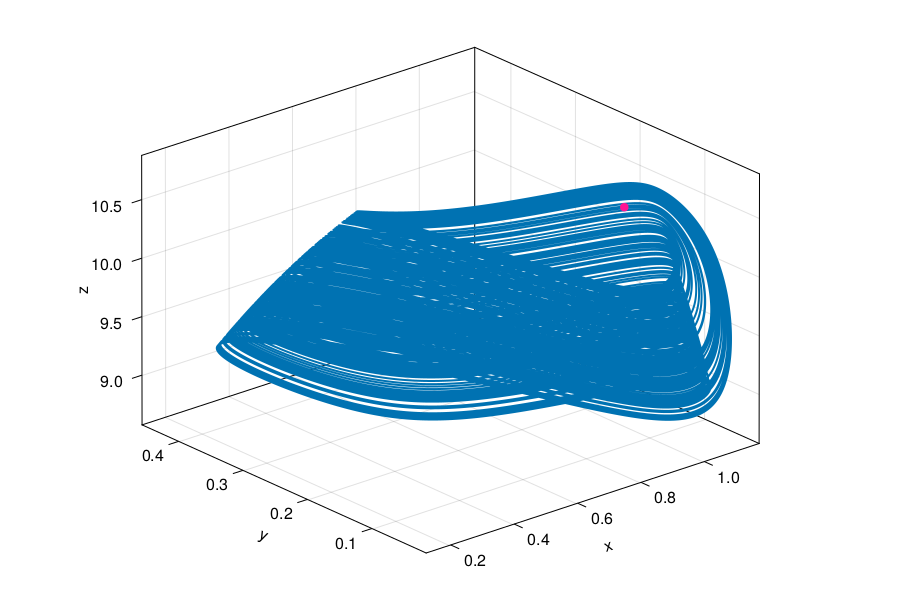

CairoMakie.Screen{IMAGE}


In [89]:
ts, tf = 100000, 900000
CairoMakie.activate!()
f = Figure(resolution = (900, 600))
ax = Axis3(f[1, 1])

idx, idy, idz = 1, 2, 3
lines!(ax, sol[ts:tf, idx], sol[ts:tf, idy], sol[ts:tf, idz], linewidth = 2.0)

idxfp = 1
scatter!(ax, fp[idxfp][idx], fp[idxfp][idy], fp[idxfp][idz], color = :deeppink)

display(f)

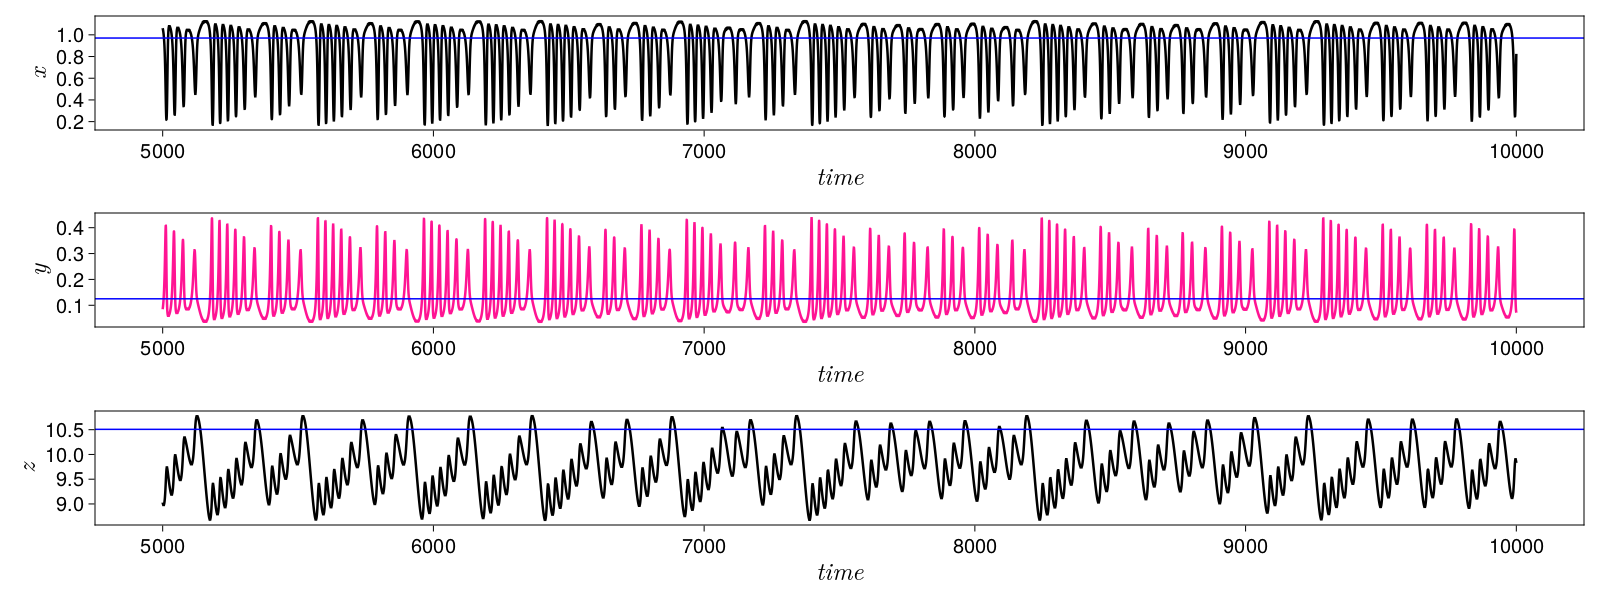

In [87]:
ts, tf = 500000, 1000001 
lb_size_ts = 25
tck_size_ts = 20
f = Figure(resolution = (1600, 600))

axisE = Axis(f[1, 1], xlabel = L"$time$", ylabel = L"$x$",
            xlabelsize = lb_size_ts, ylabelsize = lb_size_ts,
            xticklabelsize = tck_size_ts, yticklabelsize = tck_size_ts,
            xgridvisible = false, ygridvisible = false)
axisx = Axis(f[2, 1], xlabel = L"$time$", ylabel = L"$y$",
            xlabelsize = lb_size_ts, ylabelsize = lb_size_ts,
            xticklabelsize = tck_size_ts, yticklabelsize = tck_size_ts,
            xgridvisible = false, ygridvisible = false)
axisy = Axis(f[3, 1], xlabel = L"$time$", ylabel = L"$z$",
            xlabelsize = lb_size_ts, ylabelsize = lb_size_ts,
            xticklabelsize = tck_size_ts, yticklabelsize = tck_size_ts,
            xgridvisible = false, ygridvisible = false)

lines!(axisE, trange[ts:tf], sol[ts:tf, 1], linewidth = 2.5, color = :black)
hlines!(axisE, fp[idxfp][1], color = :blue)

lines!(axisx, trange[ts:tf], sol[ts:tf, 2], linewidth = 2.5, color = :deeppink)
hlines!(axisx, fp[idxfp][2], color = :blue)

lines!(axisy, trange[ts:tf], sol[ts:tf, 3], linewidth = 2.5, color = :black)
hlines!(axisy, fp[idxfp][3], color = :blue)
f